In [166]:
!nvidia-smi

Thu Aug 27 18:01:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN RTX           Off  | 00000000:04:00.0 Off |                  N/A |
| 41%   52C    P2   110W / 280W |   9506MiB / 24220MiB |     54%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN RTX           Off  | 00000000:05:00.0 Off |                  N/A |
| 60%   79C    P2   145W / 280W |   9304MiB / 24220MiB |     55%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [ ]:
######### IMPORTING NECESSARY MODULES #########
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset
import sys
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data

import torch.optim as optim

sys.path.append('/home/ironman/abhishek/Fixtures_Data/architectures/')
sys.path.append('/home/ironman/abhishek/Fixtures_Data/Helper/')
from dataloader import mydataset, create_prime_dict 
from ringloss import RingLoss
from cutmix_rl_trainer import train, test_classify, eval_classify
from resnet_models import ResNet,Bottleneck
from Load_model import load
from plot_curves import plot_loss, plot_acc

In [ ]:
device = torch.device('cuda:4' if torch.cuda.is_available() else 'cpu')
print(device)

**Dataloading Scheme**

In [ ]:
trainlist = 'Fixtures_Data_manual_clean_new_training_list_toys.txt'
validlist ='Fixtures_Data_manual_clean_new_validation_list_toys.txt'

In [ ]:
prime_dict = create_prime_dict(trainlist)

In [ ]:
#### Train Dataloader #### 
train_dataset = mydataset(trainlist, prime_dict, name='train')          
train_dataloader = data.DataLoader(train_dataset, shuffle= True, batch_size = 256, num_workers=16,pin_memory=True)


#### Validation Dataloader #### 
validation_dataset = mydataset(validlist, prime_dict, name='valid')         
validation_dataloader = data.DataLoader(validation_dataset, shuffle=False, batch_size = 128, num_workers=16,pin_memory=True)

**Model Definition**

In [ ]:
model = ResNet(Bottleneck, [3, 4, 6, 3], num_classes = 3323)

model = nn.DataParallel(model,device_ids=[4,5,6,7]).to(device)
model

**Hyperparameters**

In [8]:
## Loss Function
criterion = nn.CrossEntropyLoss()

ringloss_block = RingLoss(device,loss_weight=1.0)

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-4, momentum=0.9)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size= 30, gamma = 0.1)

# Epochs
num_Epochs = 120

beta=1

cutmix_prob = 1

In [9]:
modelpath = '../saved_model_checkpoints/Fixture_Data/Cutout_AutoAugment_R50'

In [10]:
train(model, train_dataloader, validation_dataloader, beta, cutmix_prob, criterion, optimizer, lr_scheduler,
      ringloss_block, modelpath, device, epochs = num_Epochs)

loss 9.246611595153809
loss 17.867504138946533
loss 26.202495970726012
loss 34.36722490787506
loss 42.39777515888214
loss 50.229521040916445
loss 57.91231838226318
loss 65.4463511133194
loss 72.82533909797668
loss 80.01359691143035
loss 86.97288506984711
loss 93.75956719398499
Epoch:  1
training loss =  7.756422400286224
Validation Loss: 4.5831	Top 1 Validation Accuracy: 0.2296	 Top 5 Validation Accuracy: 0.4042
loss 6.559948301315307
loss 13.060836277008057
loss 19.316461749076844
loss 25.357888531684875
loss 31.317279448509215
loss 37.193626313209535
loss 42.93757495880127
loss 48.5162069272995
loss 54.05902307510376
loss 59.5407444190979
loss 64.84708912611008
loss 70.11447384119033
Epoch:  2
training loss =  5.807447616146263
Validation Loss: 2.5470	Top 1 Validation Accuracy: 0.5504	 Top 5 Validation Accuracy: 0.7089
loss 5.180237812995911
loss 10.286509518623353
loss 15.244963185787201
loss 20.130705897808074
loss 24.977167551517486
loss 29.82996952056885
loss 34.61141051769257
lo

loss 5.558989912867546
loss 8.368378339409828
loss 11.168175819516183
loss 13.979015821814537
loss 16.797184457182883
loss 19.582081717848776
loss 22.3276254683733
loss 25.113631380200385
loss 27.9423209387064
loss 30.718911786675452
loss 33.56773069560528
Epoch:  21
training loss =  2.7996856642277885
Validation Loss: 1.1257	Top 1 Validation Accuracy: 0.7923	 Top 5 Validation Accuracy: 0.9103
loss 2.769052132368088
loss 5.563969657421112
loss 8.359185098409652
loss 11.099271550178528
loss 13.964632045030594
loss 16.81891777396202
loss 19.6025175178051
loss 22.42560154080391
loss 25.15103797674179
loss 27.937464359998703
loss 30.774161158800126
loss 33.58749211549759
Epoch:  22
training loss =  2.7951006897817856
Validation Loss: 1.1452	Top 1 Validation Accuracy: 0.7833	 Top 5 Validation Accuracy: 0.9031
loss 2.7280121779441835
loss 5.489727588891983
loss 8.20583508849144
loss 10.996074047088623
loss 13.808540061712264
loss 16.564767088890076
loss 19.270912784337998
loss 21.97586899638

Validation Loss: 0.7172	Top 1 Validation Accuracy: 0.8550	 Top 5 Validation Accuracy: 0.9515
loss 1.964415573477745
loss 3.893913784623146
loss 5.822053182125091
loss 7.735482321977615
loss 9.727187376618385
loss 11.75059342443943
loss 13.679602164626122
loss 15.672495527267456
loss 17.62898985683918
loss 19.558347519040108
loss 21.477855015993118
loss 23.464304474592208
Epoch:  41
training loss =  1.9569894677089854
Validation Loss: 0.7128	Top 1 Validation Accuracy: 0.8558	 Top 5 Validation Accuracy: 0.9510
loss 1.935699393749237
loss 3.8718020367622374
loss 5.790696566700936
loss 7.675604771971702
loss 9.591414803266526
loss 11.576415939331055
loss 13.539856615066528
loss 17.440784209966658
loss 19.368794232010842
loss 21.32163738846779
loss 23.250305104851723
Epoch:  42
training loss =  1.9384753022337036
Validation Loss: 0.7107	Top 1 Validation Accuracy: 0.8577	 Top 5 Validation Accuracy: 0.9503
loss 1.9306028404831885
loss 3.849478633701801
loss 5.736443520486355
loss 7.7132523605

loss 10.757498024106026
loss 12.635393618941308
loss 14.482378214597702
loss 16.323741624355318
loss 18.237155133485793
loss 20.07190672457218
loss 21.868096050024032
Epoch:  60
training loss =  1.8233375667489913
Validation Loss: 0.6945	Top 1 Validation Accuracy: 0.8581	 Top 5 Validation Accuracy: 0.9524
loss 1.7877120471000671
loss 3.530202310681343
loss 5.2623572272062304
loss 7.074933710694313
loss 8.791496426463127
loss 10.514496895670892
loss 12.324939463734626
loss 14.091459871530533
loss 15.858389245867729
loss 17.6231569480896
loss 19.39243928015232
loss 21.098010794520377
Epoch:  61
training loss =  1.7600803958578697
Validation Loss: 0.6626	Top 1 Validation Accuracy: 0.8633	 Top 5 Validation Accuracy: 0.9563
loss 1.791839626431465
loss 3.5529417002201082
loss 5.330891340374946
loss 7.034708275198937
loss 8.794129779338837
loss 10.556671949625015
loss 12.20089347153902
loss 13.967619244158268
loss 15.718783884942532
loss 17.431418410241605
loss 19.177575277388097
loss 20.9223

Validation Loss: 0.6497	Top 1 Validation Accuracy: 0.8638	 Top 5 Validation Accuracy: 0.9571
loss 1.715979464650154
loss 3.3948715180158615
loss 5.047851399183274
loss 6.75455511778593
loss 8.48378724962473
loss 10.236760043799878
loss 11.924734925925732
loss 13.602120402157306
loss 15.24421223729849
loss 16.851008804738523
loss 18.509841403067114
loss 20.15953817695379
Epoch:  80
training loss =  1.6812819665030092
Validation Loss: 0.6466	Top 1 Validation Accuracy: 0.8642	 Top 5 Validation Accuracy: 0.9582
loss 1.68212993144989
loss 3.3665901625156405
loss 5.062224646806717
loss 6.761403594017029
loss 8.479711551070213
loss 10.158010325431825
loss 11.794570416212082
loss 13.528148847222328
loss 15.214016112089157
loss 16.854921550154685
loss 18.570269379615784
loss 20.24040858268738
Epoch:  81
training loss =  1.6875208983253718
Validation Loss: 0.6403	Top 1 Validation Accuracy: 0.8651	 Top 5 Validation Accuracy: 0.9586
loss 1.6380685156583785
loss 3.2846214827895164
loss 4.9366613164

loss 9.994220903813838
loss 11.573512637913227
loss 13.220725362002849
loss 14.92730353742838
loss 16.54981114625931
loss 18.20062279701233
loss 19.89672549366951
Epoch:  99
training loss =  1.656405797596038
Validation Loss: 0.6387	Top 1 Validation Accuracy: 0.8666	 Top 5 Validation Accuracy: 0.9580
loss 1.6399352777004241
loss 3.2749321985244753
loss 4.969222676753998
loss 6.607273516654968
loss 8.227882494330407
loss 9.933703479766846
loss 11.60206466436386
loss 13.242008329629899
loss 14.89703223824501
loss 16.547981110215186
loss 18.228930600881576
loss 19.92606897085905
Epoch:  100
training loss =  1.6592180480088856
Validation Loss: 0.6385	Top 1 Validation Accuracy: 0.8674	 Top 5 Validation Accuracy: 0.9588
loss 1.6599558794498444
loss 3.3394091367721557
loss 5.015721341967582
loss 6.708325902223587
loss 8.380406398177147
loss 10.035395893454552
loss 11.714410771727563
loss 13.407269947528839
loss 15.081547993421555
loss 16.734867590665818
loss 18.370958492159843
loss 20.0476674

loss 8.233165767788886
loss 9.855773407220841
loss 11.45851852595806
loss 13.103253563046456
loss 14.776870423555375
loss 16.44809156000614
loss 18.1171700745821
loss 19.775819935798644
Epoch:  119
training loss =  1.6530042397090798
Validation Loss: 0.6314	Top 1 Validation Accuracy: 0.8675	 Top 5 Validation Accuracy: 0.9595
loss 1.6954940420389175
loss 3.432410174012184
loss 5.057954087257385
loss 6.7513708060979845
loss 8.393876515626907
loss 10.066198163032531
loss 11.779829843640327
loss 13.434128167033196
loss 15.095515854656696
loss 16.815123479664326
loss 18.415334553420543
loss 20.080476537644863
Epoch:  120
training loss =  1.6769007556670086
Validation Loss: 0.6335	Top 1 Validation Accuracy: 0.8670	 Top 5 Validation Accuracy: 0.9587


In [10]:
#### Load saved model from checkpoint  #####
model, optimizer, lr_scheduler, train_loss, v_loss, v_acc, epoch = load(modelpath, model, optimizer, lr_scheduler)


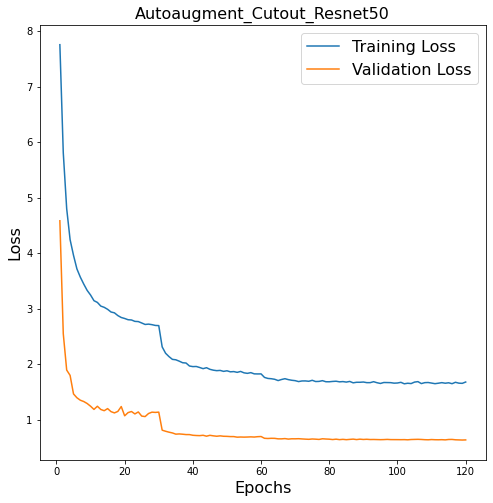

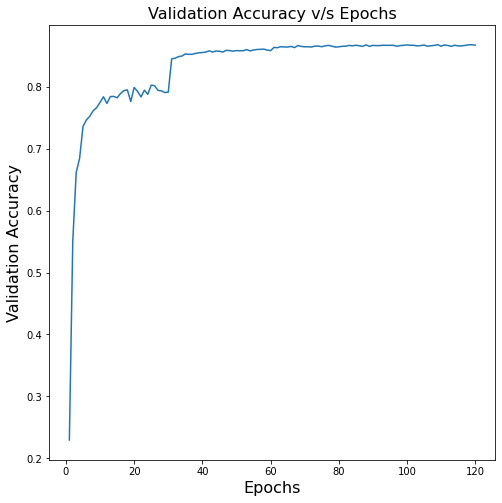

In [11]:
#### Plot Loss Curves ####
plot_loss(epoch, train_loss, v_loss, title = 'Autoaugment_Cutout_Resnet50')
plot_acc(epoch, v_acc)

In [20]:
t_loss,top1_t_acc, top5_t_acc =test_classify(model, train_dataloader, criterion, device)
print('Training Loss: {:.4f}\tTop 1 Training Accuracy: {:.4f}\t Top 5 Training Accuracy: {:.4f}'.format(t_loss, top1_t_acc, top5_t_acc))

Training Loss: 0.4860	Top 1 Training Accuracy: 0.8849	 Top 5 Training Accuracy: 0.9747


In [13]:
v_loss, top1_acc, accuracy_dict= eval_classify(model, validation_dataloader, criterion, device)
print('Validation Loss: {:.4f}\tTop 1 Validation Accuracy: {:.4f}\nAccuracy:{}\t'.format(v_loss, top1_acc, accuracy_dict))

Validation Loss: 0.6382	Top 1 Validation Accuracy: 0.8663
Accuracy:defaultdict(<class 'int'>, {'Top 1 Accuracy': 86.62588180194948, 'Top 5 Accuracy': 95.84345637092761, 'Top 10 Accuracy': 97.03187659163423, 'Top 20 Accuracy': 97.89538389485702, 'Top 30 Accuracy': 98.23785967274536, 'Top 50 Accuracy': 98.57448116383222, 'Top 100 Accuracy': 99.02526124754851})	


In [145]:
f3 = open(validlist,'r')
s = f3.readlines()
f3.close()

In [146]:
s[0]

'/media/Duamutef/abhishek/Manually_cleaned_new/576981614_shelves/product_630509820559_D.7_C.910-3208-7b96b68ee143d9406cd1bd7438fd2591-N.3_3dda4eb8-f3e0-32f5-a408-415f79508a91_0_1973.jpg,576981614\n'

In [147]:
t = []
j=[]
for i in s:
    [image_addr,prime] = i.split(',')
    if image_addr[-30:].find(' - ') == -1:
        if image_addr[-30:].find(' ') == -1:
             if image_addr[-30:].find('(') == -1:
#         print(image_addr[-20:])
#                 j.append(image_addr[-30:])
                t.append(image_addr.split('new/')[1]+' '+str(prime_dict[prime[:-1]])+'\n')


In [148]:
f1 = open('/home/ironman/abhishek/Fixtures_Data/DCL/datasets/Manually_cleaned/val.txt','w') 

for line in t:
    f1.write(line)
f1.close()

In [96]:
len(set(t))

34161

In [137]:
len(t)-498

323335

In [136]:
len(j)

323385

In [138]:
k=[]
for i in j:
    if i.find(' - ') != -1 or i.find(' ') != -1 or i.find('(') != -1:
        k.append(image_addr[-30:])
